## Task-3 Exploratory Data Analysis (EDA)
### Author: Stephine Eliza Varghese
<strong>Objective</strong>: To perform an exploratory data analysis (EDA) and identify specific areas within the business where performance or profitability may be lacking.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
data = pd.read_csv (r"C:\Users\HP\OneDrive\Documents\data science\SampleSuperstore.csv")
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
#Dropping the postal and country column
data=data.drop(['Postal Code','Country'],axis=1)

In [4]:
#Number of duplicate values 
data.duplicated().sum()

50

In [5]:
# dropping the duplicates from the data
data.drop_duplicates(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9944 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9944 non-null   object 
 1   Segment       9944 non-null   object 
 2   City          9944 non-null   object 
 3   State         9944 non-null   object 
 4   Region        9944 non-null   object 
 5   Category      9944 non-null   object 
 6   Sub-Category  9944 non-null   object 
 7   Sales         9944 non-null   float64
 8   Quantity      9944 non-null   int64  
 9   Discount      9944 non-null   float64
 10  Profit        9944 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 932.2+ KB


## Statistical Summary of the data

In [7]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9944.000000,9944.000000,9944.000000,9944.000000
mean,230.752150,3.794047,0.156440,28.770873
std,624.644765,2.228752,0.206584,234.841370
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.724800
50%,55.000000,3.000000,0.200000,8.679950
75%,210.104000,5.000000,0.200000,29.534700
max,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


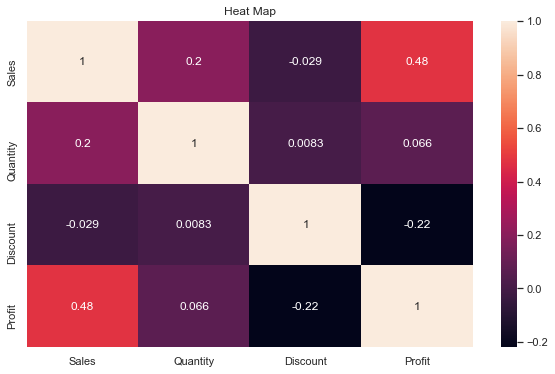

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.title("Heat Map")
plt.show()

- Sales and Profit has more correlation 
- Quantity and discount has least correlation

### Looking at the number of products

In [10]:
#List of all Categories
data['Category'].value_counts()

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

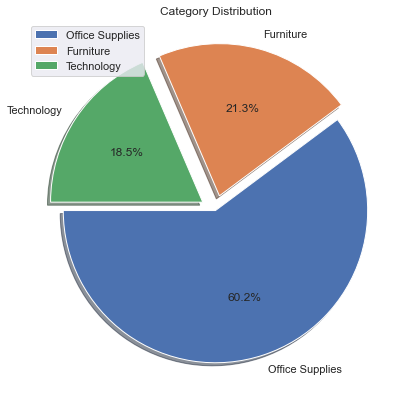

In [11]:
explode_list=[0,0.1,0.1]
plt.figure(figsize=(10, 7))
plt.pie(data['Category'].value_counts(), labels=data['Category'].value_counts().index, autopct='%1.1f%%',shadow=True, startangle=180, explode=explode_list)
plt.title("Category Distribution")
plt.legend(loc="upper left")
plt.show()

In [12]:
# List of Sub-Category
data['Sub-Category'].value_counts()

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

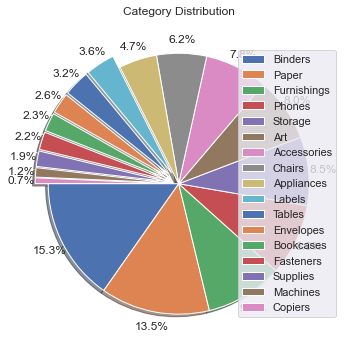

In [13]:
explode_list=[0,0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.figure(figsize=(15, 6))
plt.pie(data['Sub-Category'].value_counts(), labels=None, autopct='%1.1f%%',
        shadow=True, startangle=180, explode=explode_list, pctdistance=1.11)
plt.title("Category Distribution")
plt.legend(labels=data['Sub-Category'].value_counts().index,loc="right")
plt.show()

## Number of null values in the data

In [14]:
data.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

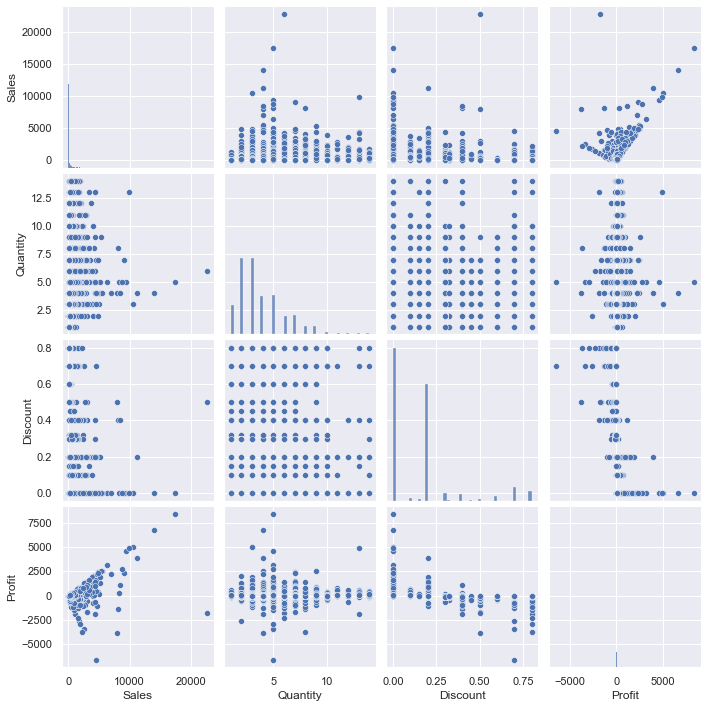

In [15]:
#to visualize the relationships between pairs of variables
sns.pairplot(data)

From the above plots we can observe that:
- Profit increases as sales increases
- As discount increases sales and profit deacreases


## Exploratory data analysis (EDA)


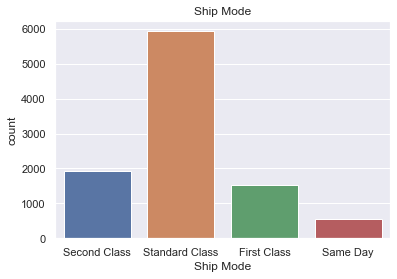

In [16]:
sns.countplot(x=data["Ship Mode"])
plt.title('Ship Mode')
plt.show()

- Most opted Ship Mode is the Standard Class.
- Least opted Ship Mode is the Same Day

In [17]:
x=data.groupby("Ship Mode")[["Profit","Sales"]].sum()
x

,Profit,Sales
Ship Mode,,
First Class,48910.4477,3.512746e+05
Same Day,15871.8869,1.283217e+05
Second Class,57425.5716,4.591240e+05
Standard Class,163889.6517,1.355879e+06


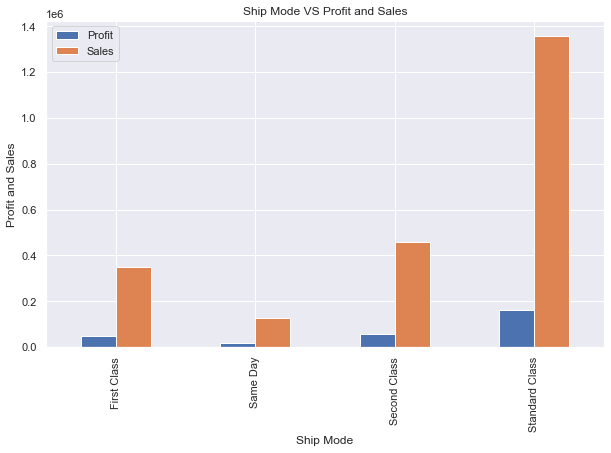

In [18]:
x.plot(kind="bar", figsize=(10,6))
plt.title("Ship Mode VS Profit and Sales")
plt.ylabel("Profit and Sales")
plt.show()

- Maximum Profit and Sales is for the ship mode opted as Standard Class and the minimum is for Same Day


In [19]:
y=data.groupby("Category")[["Profit","Sales"]].sum()
y

,Profit,Sales
Category,,
Furniture,18484.9459,740568.6663
Office Supplies,122196.0726,718256.0700
Technology,145416.5394,835774.6410


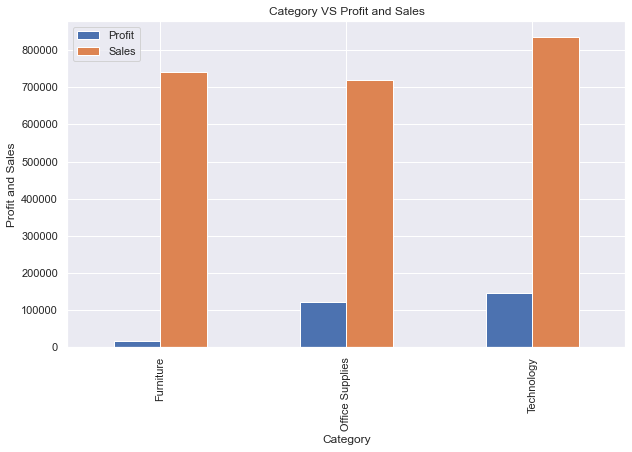

In [20]:
y.plot(kind="bar", figsize=(10,6))
plt.title("Category VS Profit and Sales")
plt.ylabel("Profit and Sales")
plt.show()

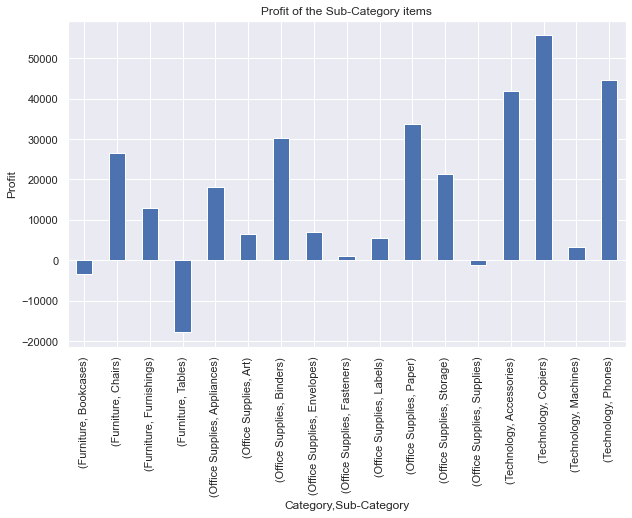

In [21]:
z=data.groupby(["Category","Sub-Category"]).Profit.sum()
z.plot(kind="bar", figsize=(10,6))
plt.title("Profit of the Sub-Category items")
plt.ylabel("Profit" )
plt.show()

- Copiers, Phones and Accessories from the Technology category makes a pretty good prfit whereas Tables and Bookcases from category Furniture and Supplies from category Office Supplies faces loss

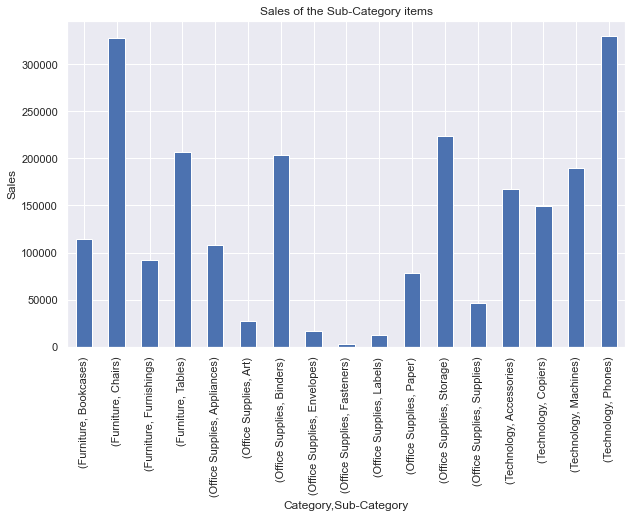

In [22]:
w=data.groupby(["Category","Sub-Category"]).Sales.sum()
w.plot(kind="bar", figsize=(10,6))
plt.title("Sales of the Sub-Category items")
plt.ylabel("Sales")
plt.show()

- Phones(Technology), Chairs(Furniture) and Storage(Office Supplies) have a pretty good sales whereas Fasteners, Labels, Art and Envelopes (Office Supplies) have less sales.

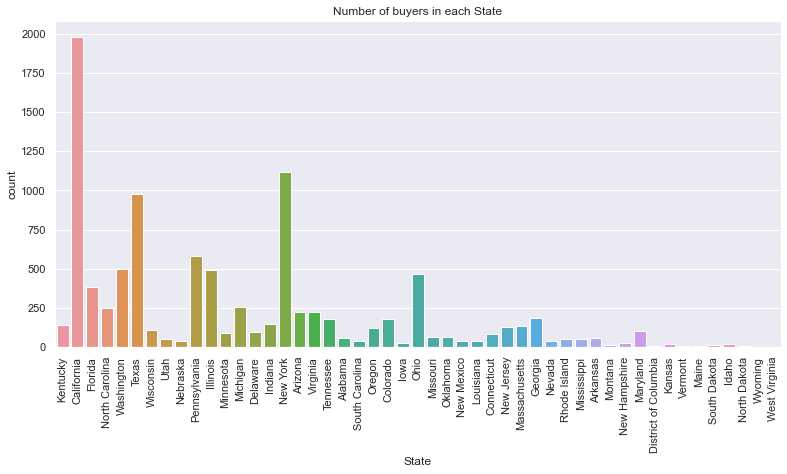

In [23]:
plt.figure(figsize=(13,6))
sns.countplot(x=data["State"])
plt.xticks(rotation=90)
plt.title('Number of buyers in each State')
plt.show()

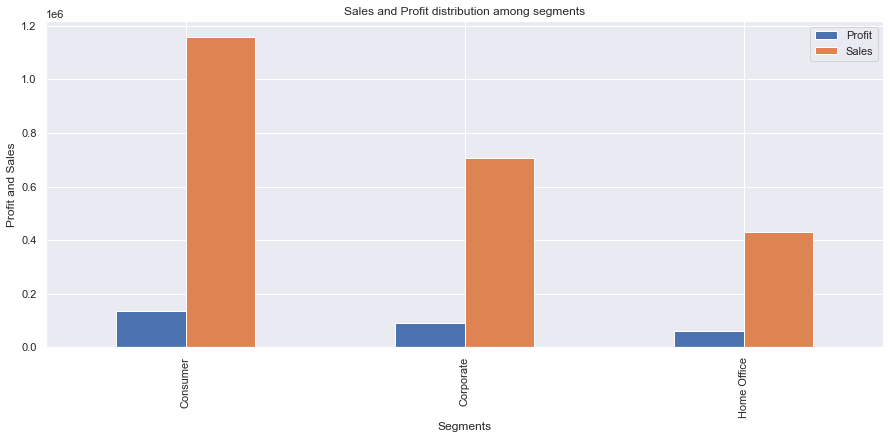

In [24]:
seg=data.groupby("Segment")[["Profit","Sales"]].sum()
seg.plot(kind="bar",figsize=(15,6))
plt.title("Sales and Profit distribution among segments")
plt.xlabel("Segments")
plt.ylabel("Profit and Sales")
plt.show()

- Most Profit and Sales in Consumer segment and least in Home Office

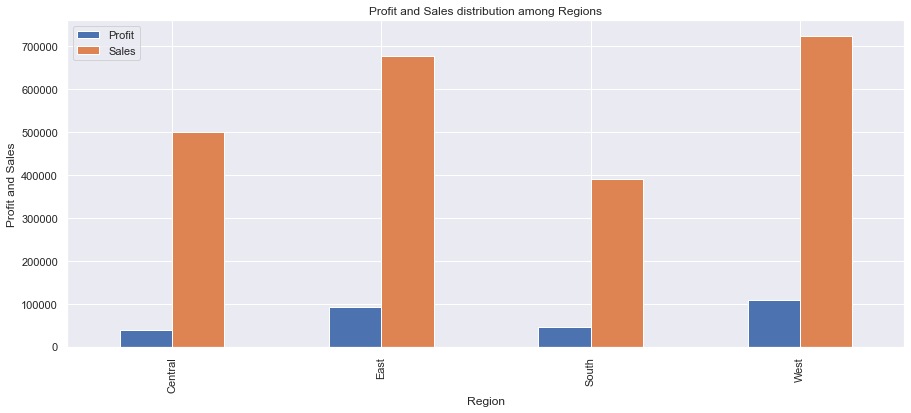

In [25]:
reg=data.groupby("Region")[["Profit","Sales"]].sum()
reg.plot(kind="bar",figsize=(15,6))
plt.title("Profit and Sales distribution among Regions")
plt.xlabel("Region")
plt.ylabel("Profit and Sales")
plt.show()

- More Profit from Western and Eastern Regions whereas lesser profits from Central and Southern regions. However sales looks pretty decent in all the regions

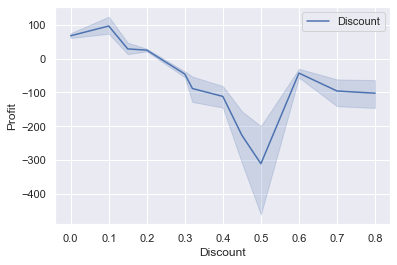

In [26]:
# Relation between Profit and Discount
sns.lineplot(x="Discount",y="Profit",data=data,label='Discount')
plt.legend()
plt.show()

- As discount increases profit decreases.

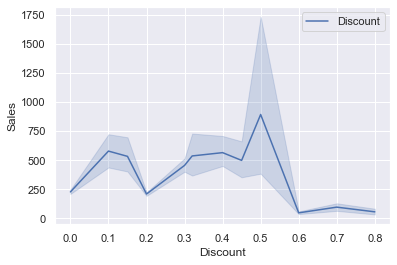

In [27]:
# Relation between Sales and Discount
sns.lineplot(x="Discount",y="Sales",data=data,label='Discount')
plt.legend()
plt.show()

### Conclusion

1. A discount of more than 20% shouldn't be provided as it causes great loss to the store. Note that at 50% sales are higher however profit is the least, hence nothing to gain from a discount that high.

2. Profit margin needs to be improved for Furnitures and Supllies(Office Supplies). Bookcases,Supplies and tables have good sales but there is no profit whatsoever. Reevaluating their pricing strategy and negotiating with suppliers for better deals that can improve the cost structure and profit margins. 

3. More marketing and promotional strategies are required to increase sales in the Central and South regions as their sales to profit ratio looks promising.

4. Profit and Sales for Phones, Copiers, Accessories, Binders and Chairs are good for the store. Pirchasing more varities and latest models of them will bring in more sales.
